In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from sklearn import neighbors

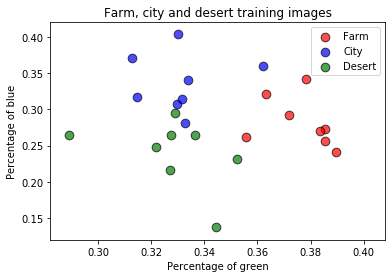

In [2]:
image_files = ['farm1.jpg', 'farm2.jpg', 'farm3.jpg', 'farm4.jpg',
 'farm5.jpg', 'farm6.jpg', 'farm7.jpg', 'farm8.jpg',
 'city1.jpg', 'city2.jpg', 'city3.jpg', 'city4.jpg',
 'city5.jpg', 'city6.jpg', 'city7.jpg', 'city8.jpg',
 'desert1.jpg', 'desert2.jpg', 'desert3.jpg', 'desert4.jpg',
 'desert5.jpg', 'desert6.jpg', 'desert7.jpg', 'desert8.jpg']

farm_green = []
farm_blue = []
city_green = []
city_blue = []
desert_green = []
desert_blue = []

for image in image_files[:8]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    totalColor = averageRed+averageGreen+averageBlue
    percent_green = averageGreen/totalColor
    percent_blue = averageBlue/totalColor
    farm_green.append(percent_green)
    farm_blue.append(percent_blue)
for image in image_files[8:16]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    totalColor = averageRed+averageGreen+averageBlue
    percent_green = averageGreen/totalColor
    percent_blue = averageBlue/totalColor
    city_green.append(percent_green)
    city_blue.append(percent_blue)
for image in image_files[16:]:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    totalColor = averageRed+averageGreen+averageBlue
    percent_green = averageGreen/totalColor
    percent_blue = averageBlue/totalColor
    desert_green.append(percent_green)
    desert_blue.append(percent_blue)

#scatter plot to show percentages of green and blue

plt.scatter(farm_green, farm_blue, s=75, facecolors ='red', edgecolors='black', alpha=0.7)
plt.scatter(city_green, city_blue, s=75, facecolors ='blue', edgecolors='black', alpha=0.7)
plt.scatter(desert_green, desert_blue, s=75, facecolors ='green', edgecolors='black', alpha=0.7)
plt.xlabel('Percentage of green')
plt.ylabel('Percentage of blue')
plt.title('Farm, city and desert training images')
plt.legend(['Farm','City','Desert'])
plt.show()

In [3]:
training_target = ['farm', 'farm', 'farm', 'farm',
 'farm', 'farm', 'farm', 'farm',
 'city', 'city', 'city', 'city',
 'city', 'city', 'city', 'city',
 'desert', 'desert', 'desert', 'desert',
 'desert', 'desert', 'desert', 'desert']

training_data = np.zeros((24,2))

for i in range(8):
    training_data[i,0] = farm_green[i]
    training_data[8+i,0] = city_green[i]
    training_data[16+i,0] = desert_green[i]
    training_data[i,1] = farm_blue[i]
    training_data[8+i,1] = city_blue[i]
    training_data[16+i,1] = desert_blue[i]
    
for i in training_data:
    print(i)
    
k1 = neighbors.KNeighborsClassifier(1,weights='distance')
k1.fit(training_data,training_target)

[0.38537916 0.27250258]
[0.38947877 0.2416675 ]
[0.37176749 0.2923693 ]
[0.38534941 0.25567274]
[0.38368854 0.26974449]
[0.37822351 0.34243724]
[0.35577841 0.26138973]
[0.36318264 0.32079251]
[0.33384679 0.33987008]
[0.31457989 0.31740955]
[0.32982159 0.30761097]
[0.33021422 0.40329483]
[0.31267745 0.37068047]
[0.3620055  0.35922372]
[0.33263931 0.28122414]
[0.33155648 0.31387494]
[0.28899154 0.26478622]
[0.32887465 0.29461288]
[0.32171351 0.24749944]
[0.35209261 0.23171261]
[0.32718513 0.21564911]
[0.33655681 0.2638719 ]
[0.34419192 0.13749538]
[0.32732039 0.26438328]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [4]:
test = ['test1.jpg','test2.jpg','test3.jpg']
test_green = []
test_blue = []
for image in test:
    img = mpimg.imread(image)
    RGBtuple = np.array(img).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]
    totalColor = averageRed+averageGreen+averageBlue
    percent_green = averageGreen/totalColor
    percent_blue = averageBlue/totalColor
    test_green.append(percent_green)
    test_blue.append(percent_blue)
test_data = np.zeros((3,2))
for i in range(3):
    test_data[i,0] = test_green[i]
    test_data[i,1] = test_blue[i]
for i in test_data:
    print(i)
    
test_Actual = ['city','desert','farm']

k1_pred = k1.predict(test_data)
print("Predicted test data is "+str(k1_pred))
print("Actual test data is "+str(test_Actual))

[0.3269592  0.32688513]
[0.33429384 0.17936789]
[0.35004008 0.24578861]
Predicted test data is ['city' 'desert' 'desert']
Actual test data is ['city', 'desert', 'farm']
